今週の講義は常微分方程式（ODEs: ordinary differential equations）の数値解法のベクトル編です．

**課題**：以下のsymplectic Euler法の関数を完成させてください．

時刻$T=3$まで数値計算することを考えます．いくつか変数を準備します．

In [ ]:
using Plots

In [ ]:
T =6.0;
N = 60; # TやNは適当に変更して色々試してみてください
h = T / N;
t = 0:h:T;
y0 = [1.0;0.0];

In [ ]:
#右辺の関数を定義します．
function f(y)
    return [y[2] ; -y[1]]
end

In [ ]:
# 数値解を格納する配列
yEE = zeros(2, N+1); # 陽的Euler用
yEE[:, 1] = y0; # 初期値
yRK = zeros(2, N+1); # Runge--Kutta用
yRK[:, 1] = y0; # 初期値
ysE = zeros(2, N+1); # symplectic Euler用
ysE[:, 1] = y0; # 初期値

In [ ]:
# 陽的Euler法の一ステップ
function ExEuler(y,h)
    return y + h * f(y)
end

In [ ]:
# Runge-Kutta法の一ステップ
function RK(y,h)
    Y1 = y
    Y2 = y + h/2 * f(Y1)
    Y3 = y + h/2 * f(Y2)
    Y4 = y + h   * f(Y3)
    return y + h/6 * (f(Y1) + 2*f(Y2) + 2*f(Y3) + f(Y4) )
end

In [ ]:
# symplectic Euler法の一ステップ (fは使わずに書く)
function SymEuler(y,h)
#     
#     return 
end

In [ ]:
for n = 1 : N
    yEE[:, n+1] = ExEuler(yEE[:, n],h)
    yRK[:, n+1] = RK(yRK[:, n],h) 
#     ysE[:, n+1] = SymEuler(ysE[:, n],h) # 上のsymplectic Euler法の関数が完成したら一番左の # を消す．
end

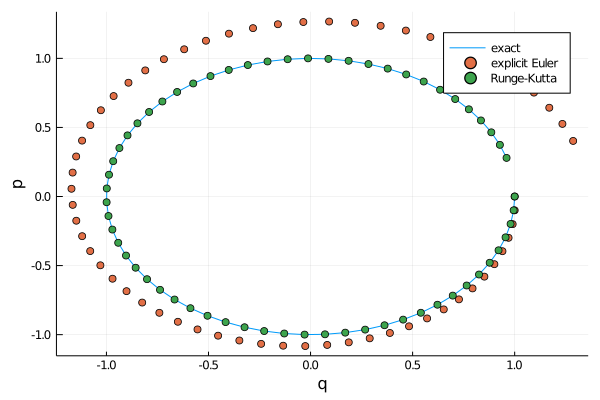

In [9]:
plot(cos.(t),-sin.(t),label="exact")
scatter!(yEE[1,:],yEE[2,:],label="explicit Euler")
scatter!(yRK[1,:],yRK[2,:],label="Runge-Kutta") 
# scatter!(ysE[1,:],ysE[2,:],label="symplectic Euler") # 上のsymplectic Euler法の関数が完成したら一番左の # を消す．
xlabel!("q")
ylabel!("p")

symplectic Euler法の結果はどうなったでしょうか．4次精度のRK法が厳密解に近いのは直感的にも納得できると思いますが，symplectic Euler法は陽的Euler法と同じ1次精度解法です．ちょっと不思議な結果になったと思います．関連する問題をレポート課題で出題しています．